# Machine Learning with Python

Now that we've learned how to acquire, clean, and visualize our data, let's start doing some machine learning. Throughout this workshop, we will be using a Python package called scikit-learn. It is surprisingly easy to implement machine learning algorithms using scikit-learn, and in fact much of the work is done for you. Often, it is the acquisition and structuring of the data itself that requires the most finesse. Because of this, we will be working with pre-processed data to illustrate just how simple machine learning can be using scikit-learn. 

Before we dive in, let's start with some background on machine learning. There are two main types of machine learning algorithms: **supervised** and **unsupervised**. The goal of **supervised learning** is to train a model to classify data against a set of labels. For instance, we can train a model to separate images according to whether or not the image contains a face. In this case, the two labels would be *face* and *no face*. The presence of labeled training data is a huge advantage in machine learning, however it is not always available.

When labeled training data is unavailable, we must use **unsupervised learning**. The goal of unsupervised learning is to train a model to extract *meaningful features* from the data. These meaningful features are often common patterns which are useful for compressing the information contained in the data. For example, in speech recognition, individual phonemes serve as meaningful features from which it is possible to reconstruct words independently of their tone or pitch. In computer vision, oriented edge-detectors are often the best features.

##Digit Recognition

In the first half of this workshop, we'll be using a very important supervised machine learning algorithm called the **support vector machine** to classify handwritten digits. This is a very well-studied problem in the machine learning community, and serves as a great starting point. First, let's import scikit-learn and a couple other modules we'll need.

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
import numpy as np

Now, sklearn comes with a few preloaded datasets, so let's load up the handwritten digits dataset. This is a list of pixel intensities corresponding to images of handwritten digits plus their associated labels (0-9).

In [5]:
digits = datasets.load_digits()
print (digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


Let's use matplotlib to see what one of these images looks like

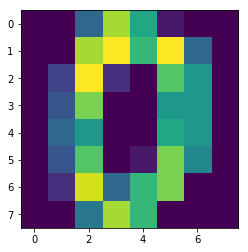

In [6]:
%matplotlib inline
plt.imshow(digits.images[0])
plt.show()

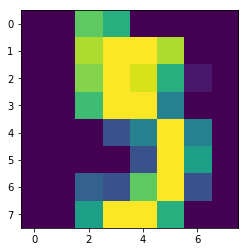

In [8]:
plt.imshow(digits.images[5])
plt.show()

By default, matplotlib plots each value on a color scale. We can convert this to greyscale to get a better idea of the actual image.

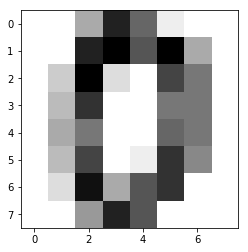

In [9]:
plt.imshow(digits.images[0], cmap = plt.cm.gray_r)
plt.show()

Now that we've got a better idea of what our data looks like, let's begin organizing it. An important concept in machine learning is overfitting. Overfitting typically occurs when a model has a large number of parameters, but not much data. An overfit model will perform very well on its training data, but will be unable to generalize beyond this training data.

To prevent overfitting, we will split our dataset into two groups: training data and test data. This will allow us to evaluate how our model performs on data it's never seen before. This procedure is called cross-validation and is extremely important in machine learning.

In [11]:
from sklearn.cross_validation import train_test_split

data_train, data_test, labels_train, labels_test = train_test_split(digits.data,
                                                                   digits.target,
                                                                   test_size = .3,
                                                                   random_state = 42) #random state is like seed

C:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
labels_train

array([8, 7, 1, ..., 2, 7, 1])

Video describing SVM: https://www.youtube.com/watch?v=mA5nwGoRAOo

From here, creating and training our classifier is relatively straightforward.

In [14]:
clf = svm.SVC(gamma = 0.001, C = 100)
clf.fit(data_train, labels_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Now let's compute the accuracty of our classifier using the test data.

In [16]:
accuracy = clf.score(data_test, labels_test)
accuracy

0.9907407407407407

Video describing C: https://www.youtube.com/watch?v=joTa_FeMZ2s

Video describing gamma: https://www.youtube.com/watch?v=m2a2K4lprQw

That's pretty impressive. So what are those mysterious values gamma and C? The C parameter controls the penalty for misclassification of each example in the training data. Large values of C highly penalize misclassification, and thus will fit to the training data more exactly. However, this can lead to overfitting and trouble with outliers, in which case a smaller value of C should be chosen.

The gamma parameter is somewhat more complicated, but it can be understood to be the radius of influence of the individual support vectors. More info can be found in the sklearn SVM documentation: http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

So let's try changing the values of C and gamma and see what we get.

In [17]:
clf = svm.SVC(gamma = 0.1, C = 100)
clf.fit(data_train, labels_train)
accuracy = clf.score(data_test, labels_test)
accuracy #becomes 9% which is bad

0.09259259259259259

We can automate the process of finding the best values of gamma and C (also known as hyperparameters) by using sklearn's built in grid-search function. Note that a new classifier must be built, trained, and evaluated for each combination of hyperparameters, so this process can be time consuming.

In [20]:
from sklearn.grid_search import GridSearchCV
param_grid = {"C": [1,10,100], "gamma":[.1,.01,.001]}
gridsearch = GridSearchCV(svm.SVC(), param_grid)
gridsearch.fit(data_test, labels_test)
print(gridsearch.best_params_)

{'C': 10, 'gamma': 0.001}


## Kaggle: Making a Submission

Kaggle is an excellent platform for participating in data science competitions, accessing cool datasets, and getting involved in the data science community. For part two of this workshop, we will be using Kaggle's Biological Response competition data to create a Kaggle submission entry. This is part of Kaggle's Getting Started with Python tutorial, which can be found here: https://www.kaggle.com/wiki/GettingStartedWithPythonForDataScience

First let's check out the dataset, which can be found here: https://www.kaggle.com/c/bioresponse/data. 

In [21]:
import pandas as pd
data = pd.read_csv("BioResponseTrain.csv") # biological response to molecular indicator???
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


Each row in this dataframe represents a specific molecule, and the column labeled "Activity" denotes whether the molecule elicits a specific biological response, (1), or not, (0). The descriptors D1, D2, ..., D1773 quantitatively describe relevant structural and chemical properties of the molecule. The goal is to use these descriptors as features and predict the activity of new molecules.

First, let's split our data into training and test cases. Since the first column represents our labels, or target values, we must be sure to separate them from our features.

In [23]:
targets = data["Activity"]
features = data.iloc[:,1:]

features_train, features_test, targets_train, targets_test = train_test_split(features, targets, test_size = .3, random_state = 42)

targets

0       1
1       1
2       1
3       1
4       0
5       0
6       1
7       1
8       1
9       0
10      1
11      0
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      0
20      0
21      1
22      0
23      0
24      0
25      1
26      1
27      0
28      1
29      1
       ..
3721    1
3722    1
3723    0
3724    1
3725    1
3726    0
3727    0
3728    1
3729    0
3730    1
3731    0
3732    1
3733    0
3734    1
3735    1
3736    0
3737    0
3738    0
3739    1
3740    1
3741    0
3742    0
3743    0
3744    0
3745    1
3746    1
3747    1
3748    0
3749    1
3750    0
Name: Activity, dtype: int64

In [24]:
features_train.describe()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
count,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,...,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000
mean,0.076266,0.591766,0.068019,0.039524,0.210929,0.685980,0.275813,0.455651,0.749446,0.271110,...,0.025143,0.014857,0.015238,0.022476,0.015238,0.017143,0.011810,0.011048,0.020190,0.009905
std,0.076994,0.105676,0.077284,0.117272,0.102230,0.078774,0.089809,0.161590,0.071969,0.096940,...,0.156589,0.121004,0.122522,0.148254,0.122522,0.129828,0.108049,0.104545,0.140678,0.099047
min,0.000000,0.282128,0.000000,0.000000,0.002630,0.137873,0.071600,0.067800,0.275590,0.003040,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.033300,0.515541,0.000000,0.000000,0.137208,0.625657,0.208889,0.379767,0.707378,0.196318,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.066700,0.585755,0.050000,0.000000,0.190488,0.673729,0.278383,0.499343,0.738210,0.284976,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.100000,0.667152,0.100000,0.000000,0.258611,0.739747,0.336056,0.571095,0.787935,0.344084,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.766667,0.960920,0.650000,1.000000,0.932451,0.957093,0.790831,0.989870,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In this section, we'll be using a random forest classifier. The random forest classifier can be thought of as an ensemble of individual decision tree classifiers. These decision tree classifiers are trained to extract the most relevant features and make a series of decisions based on given input using these features. While decision trees are prone to overfitting by themselves, as part of an ensemble they form a robust model.


https://upload.wikimedia.org/wikipedia/commons/f/f3/CART_tree_titanic_survivors.png


In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100)
rf.fit(features_train, targets_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

Now let's use this decision tree classifier to make some predictions on our test data, and see how it holds up. 

In [34]:
accuracy = rf.score(features_test, targets_test)
print(accuracy)

0.8001776198934281


And that's an intro to Machine learning in Python!